In [1]:
from fastai.vision.all import *
import os
from pathlib import Path
!pip install rarfile
import rarfile
import os

# Path to the uploaded .rar file
rar_file_path = '/content/task3dataset.rar'

# Create a directory to extract the dataset
extract_dir = '/content/vcor_dataset/'
os.makedirs(extract_dir, exist_ok=True)

# Extract the .rar file
with rarfile.RarFile(rar_file_path) as rf:
    rf.extractall(extract_dir)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [2]:
# Set up dataset path (adjust the path if needed)
path = Path('/content/vcor_dataset')

# Define paths for train, validation, and test sets
train_path = path / 'train'
valid_path = path / 'val'
test_path = path / 'test'



In [3]:
# Define a DataBlock for classification
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Image input and categorical target
    get_items=get_image_files,           # Get images from the directory
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # 20% validation split
    get_y=parent_label,                 # Get labels from parent folder names
    item_tfms=Resize(224),              # Resize images to 224x224
    batch_tfms=aug_transforms(mult=2.0)  # Augmentation (rotation, flip, etc.)
)

# Create DataLoaders
dls = dblock.dataloaders(train_path, bs=16)  # bs is batch size


In [4]:
# Set up a pre-trained model (ResNet34 is a good balance between speed and accuracy)
learn = cnn_learner(dls, resnet34, metrics=accuracy)

# Train the model
learn.fine_tune(10)  # Fine-tune for 5 epochs (you can increase this number)




/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 47.1MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.621673,1.057705,0.644184,00:51


epoch,train_loss,valid_loss,accuracy,time
0,1.189391,0.672976,0.766001,00:57
1,1.094771,0.601045,0.788025,00:57
2,0.955413,0.615876,0.796284,00:57
3,0.840188,0.525373,0.824501,00:56
4,0.753904,0.483359,0.830007,00:57
5,0.659515,0.502086,0.812113,00:57
6,0.560915,0.428404,0.849966,00:57
7,0.481568,0.425987,0.847213,00:57
8,0.430388,0.413131,0.851342,00:55
9,0.424843,0.412274,0.853407,00:56


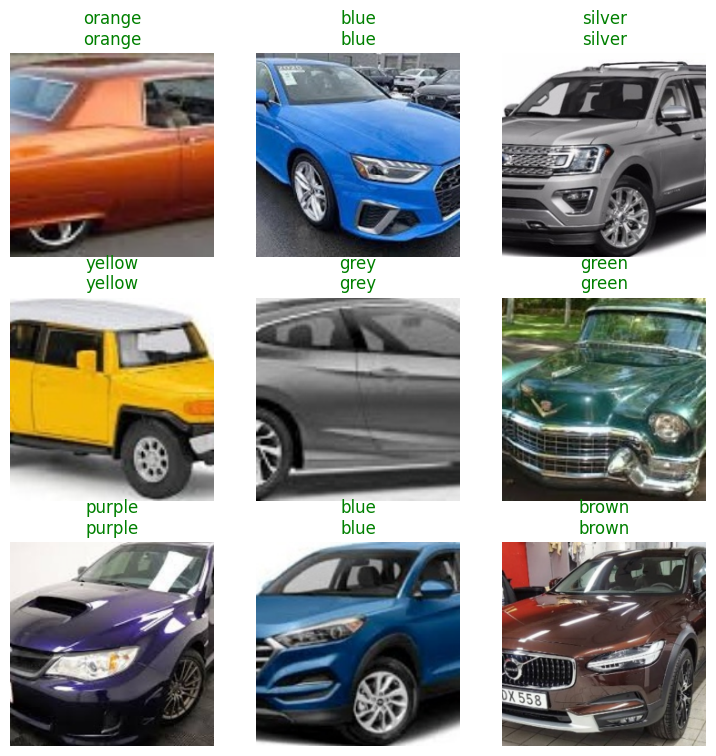

In [5]:
# Evaluate on the validation set
learn.show_results()


In [6]:
# Export the model
learn.export('/content/car_color_model.pkl')
